In [1]:
from google.colab import files
files.upload()

Saving employee_reviews.csv to employee_reviews.csv


In [2]:
!git clone https://github.com/sushil79g/customer_review.git

Cloning into 'customer_review'...
fatal: could not read Username for 'https://github.com': No such device or address


In [4]:
#numpy for mathmatical computation
import numpy as np
#pandas for dataframe computation i.e overall sql processing
import pandas as pd


In [5]:
#importing file with pandas
file = pd.read_csv('employee_reviews.csv', encoding='iso=8859-1')
#lets look @dataset
file.head(3)

,,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...


In [6]:
#list of attribute in dataset
file.columns

Index([' ', 'company', 'location', 'dates', 'job-title', 'summary', 'pros',
       'cons', 'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'helpful-count',
       'link'],
      dtype='object')

In [7]:
# lets chop out only important attribute for out project
imp_column = ['pros','cons','overall-ratings','summary']

In [8]:
our_dataset = file[imp_column]

In [9]:
our_dataset.head(5)

,pros,cons,overall-ratings,summary
0,People are smart and friendly,Bureaucracy is slowing things down,5,Best Company to work for
1,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4,"Moving at the speed of light, burn out is inev..."
2,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5,Great balance between big-company security and...
3,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5,The best place I've worked and also the most d...
4,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5,"Unique, one of a kind dream job"


In [10]:
# As the task is all about reviewing sentiment, lets combine the overall review from each employee
our_dataset['all_review'] = our_dataset['pros'] + our_dataset['cons'] + our_dataset['summary']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
import re #python module for regular expression
import nltk #python module for natural language processing
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
def remove_punctuation(x):
    line = re.sub(r'[^a-zA-Z ]+', ' ', str(x))
    return line

In [13]:
def remove_stopword(x):
    line = [word for word in x if not word in set(stopwords.words('english'))]
    return line

In [14]:
def conv_lower(x):
    new = []
    for item in x:
        new.append(item.lower())
    return new

In [15]:
nltk.download('wordnet')
lemma = nltk.wordnet.WordNetLemmatizer()
lemma.lemmatize('article')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
from textblob import TextBlob
def app_lamitz(x):
  try:
    words = x.split()
    result = []
    for wor in words:
      # print(nltk.pos_tag(wor)[0][1][0])
      if nltk.pos_tag(wor)[0][1][0]=='J':
        wor = lemma.lemmatize(wor)
#         print(wor)
      result.append(wor)
    value = ' '.join(result)
    b = TextBlob(value)
    return b.correct()
  except:
    b = TextBlob(x)
    return b.correct()


In [17]:
def preprocess_all_review(x):
    re_punct = remove_punctuation(x)
    re_stopword = remove_stopword(re_punct)
    line_lower = conv_lower(re_stopword)
    result = ' '.join(re_stopword)
    return line_lower
our_dataset['preprocess_review'] = our_dataset['all_review'].apply(preprocess_all_review)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
our_dataset.head(5)

,pros,cons,overall-ratings,summary,all_review,preprocess_review
0,People are smart and friendly,Bureaucracy is slowing things down,5,Best Company to work for,People are smart and friendlyBureaucracy is sl...,"[p, e, p, l, e, , r, e, , r, , n, , f, r, ..."
1,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,4,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...","[ , , f, , , f, , , f, , , , , c, f, ..."
2,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",5,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","[ , , i, f, , u, , r, e, , , f, w, r, e, ..."
3,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,5,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,"[y, u, , c, n, , , f, n, , , r, e, , w, ..."
4,Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",5,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"[g, g, l, e, , , , w, r, l, , f, , , w, ..."


In [19]:
import seaborn as sns

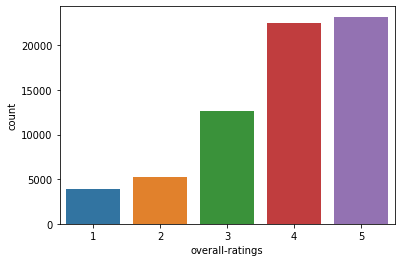

In [20]:
sns.countplot(x = 'overall-ratings', data=our_dataset)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
count_vect = CountVectorizer(max_features=3000)
x = count_vect.fit_transform(our_dataset['all_review'].values.astype('U'))

In [34]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
y = our_dataset['overall-ratings']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [37]:
our_dataset['polarity'] = our_dataset['overall-ratings'].apply(lambda x: 1 if x>3 else 0 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
file = our_dataset[['all_review','polarity']]

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [42]:
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(file['all_review'].values.astype('U'))
x = ngram_vectorizer.transform(file['all_review'].values.astype('U'))

In [43]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(x_train, y_train)
    print ("Accuracy for C=%s: %s"% (c, accuracy_score(y_test, lr.predict(x_test))))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=0.01: 0.47327113875314675


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=0.05: 0.4760353423169949


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=0.25: 0.47104990374648303


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=0.5: 0.4713954291919641
Accuracy for C=1: 0.47129670763611237


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
lr = LogisticRegression(C=0.05)
lr.fit(x_train, y_train)
print ("Accuracy for C=%s: %s"% (c, accuracy_score(y_test, lr.predict(x_test))))


Accuracy for C=1: 0.4760353423169949


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
def get_text_result(text):
  transformed_text = ngram_vectorizer.transform([text]) #To transfer the input text to vector
  prob_list = lr.predict_proba(transformed_text).tolist() #To predict probability of polarrity
  max_value_prob = max(prob_list)
  max_index = prob_list.index(max_value_prob)
  
  if max_index == 0:
    return('negative',max_value_prob)    
  
  return ('positive',max_value_prob)

In [52]:
print(get_text_result('i really do not have intrest in living the place'))

ValueError: ignored

In [53]:
#using stratifiedKFlod
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
y = file['polarity']
skf.get_n_splits(x, y)

5

In [54]:
for train_index, test_index in skf.split(x, y):
   x_train, x_test = x[train_index], x[test_index]
   y_train, y_test = y[train_index], y[test_index]
   lr = LogisticRegression(C=0.05)
   lr.fit(x_train, y_train)
   print ("Accuracy for C=%s: %s"%(0.05, accuracy_score(y_test, lr.predict(x_test))))

Accuracy for C=0.05: 0.8062342662520361


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=0.05: 0.7806160225085147
Accuracy for C=0.05: 0.7948319265511624


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=0.05: 0.7656597067969791
Accuracy for C=0.05: 0.7706775268419104


In [56]:
###TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
ngram_vectorizer.fit(file['all_review'].values.astype('U'))
x = ngram_vectorizer.transform(file['all_review'].values.astype('U'))
x_train_rating, x_test_rating, y_train_rating, y_test_rating = train_test_split(x, file['polarity'], train_size = 0.70)
for c in [1.5,1.75,2.0,2.5,3.0,3.5,4.0,4.5,5.0]:
    lr = LogisticRegression(C=c)
    lr.fit(x_train_rating, y_train_rating)
    print ("Accuracy for C=%s: %s"%(c, accuracy_score(y_test_rating, lr.predict(x_test_rating) ) ))
    print( 'precision:',precision_score(y_test_rating, lr.predict(x_test_rating) , average='macro') )
    print('recall', recall_score(y_test_rating, lr.predict(x_test_rating), average='macro'))
    print('f1-score',f1_score(y_test_rating,lr.predict(x_test_rating), average='macro'))
    print(' ')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=1.5: 0.7916975171528703
precision: 0.7940379354039446
recall 0.7101969232229866
f1-score 0.7288236167625456
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=1.75: 0.7929315366010168
precision: 0.7933141652854154
recall 0.713487889730416
f1-score 0.731998019333775
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=2.0: 0.7937706698257565
precision: 0.7929245077250124
recall 0.7156940390712584
f1-score 0.7341013454338845
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=2.5: 0.795004689273903
precision: 0.7922207316911443
recall 0.7191039101444743
f1-score 0.7372839288829289
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=3.0: 0.7968310380571598
precision: 0.7930411343272994
recall 0.7227537870333973
f1-score 0.7408336542685351
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=3.5: 0.7971765635026408
precision: 0.7921137666831359
recall 0.7243569771659857
f1-score 0.7421919959112069
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=4.0: 0.7977688928377511
precision: 0.791801401596447
recall 0.7260634726263905
f1-score 0.7437150620618773
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy for C=4.5: 0.7985586652845649
precision: 0.7920249315209593
recall 0.7277971235516816
f1-score 0.7453291080364826
 
Accuracy for C=5.0: 0.798509304506639
precision: 0.7911049065252718
recall 0.7285136707939933
f1-score 0.7458311223693073
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
# Saving model to disk
import pickle
pickle.dump(lr, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
